# Übung: Random walk (Lösung)

Quellen:

* https://www.geeksforgeeks.org/random-walk-implementation-python/
* https://towardsdatascience.com/random-walks-with-python-8420981bc4bc
* rp


## Aufgaben

### Aufgabe 1:

Ein Würfel wird geworfen. Bei "1" oder "2" wird die Zahl "-1" notiert, bei 3 oder 4 die Zahl 0, sonst die Zahl 1.  Die Zeitreihe besteht aus den Zeitpunkten des Wurfs und dem y-Wert "-1", "0" oder "1".

### Aufgabe 2:

Ein Würfel wird geworfen. Bei "1" oder "2" wandert ein Punkt auf einer Geraden um die Strecke  "-1", bei 3 oder 4 bleibt er stehen, anderenfalls die Strecke 1. Die Zeitreihe besteht aus den Zeitpunkten des Wurfs und der aktuellen Position.

### Fragen:

* Wie sieht der Graf zum Experiment aus?
* Handelt es sich um einen stochastischen Prozess?
* Handelt es sich um einen stationären Prozess?
* Wie sehen Mittel- und Erwartungswert aus?
* Wie ist es um die Streuung bestellt?

## Random Walk

Ein Random Walk ist ein stochastischer Prozess. Er beschreibt einen Weg, der aus einer Abfolge von Zufallsschritten in einem mathematischen Raum wie den ganzen Zahlen besteht. Ein elementares Beispiel für einen Random Walk ist der Random Walk auf der Zahlengeraden, der bei 0 beginnt und sich bei jedem Schritt mit gleicher Wahrscheinlichkeit um +1 oder -1 bewegt. Andere Beispiele sind der Weg eines Moleküls in einer Flüssigkeit oder einem Gas, der Suchpfad eines Tieres, der Preis einer schwankenden Aktie oder der finanzielle Status eines Spielers.

Sie alle lassen sich durch Zufallsmodelle annähern, auch wenn solche Modelle in Wirklichkeit nicht wirklich zufällig sind. Random Walks finden in vielen wissenschaftlichen Bereichen Anwendung, darunter Ökologie, Psychologie, Informatik, Physik, Chemie, Biologie und Wirtschaft. 

Random Walks erklären das beobachtete Verhalten vieler Prozesse in diesen Bereichen und dienen somit als grundlegendes Modell für die erfasste stochastische Aktivität. Als eher mathematische Anwendung kann der Wert von Pi durch die Verwendung von Random Walk in der agentenbasierten Modellierungsumgebung angenähert werden.

<data/Milkbrownar.ogv.240p.video.vp9.mp4>    
<https://commons.wikimedia.org/wiki/File:Milkbrownar.ogv>

## Aufgabe 1

mean +- std for 0:50000000 and 50000000:100000000
-0.0 +- 0.82
0.0 +- 0.82


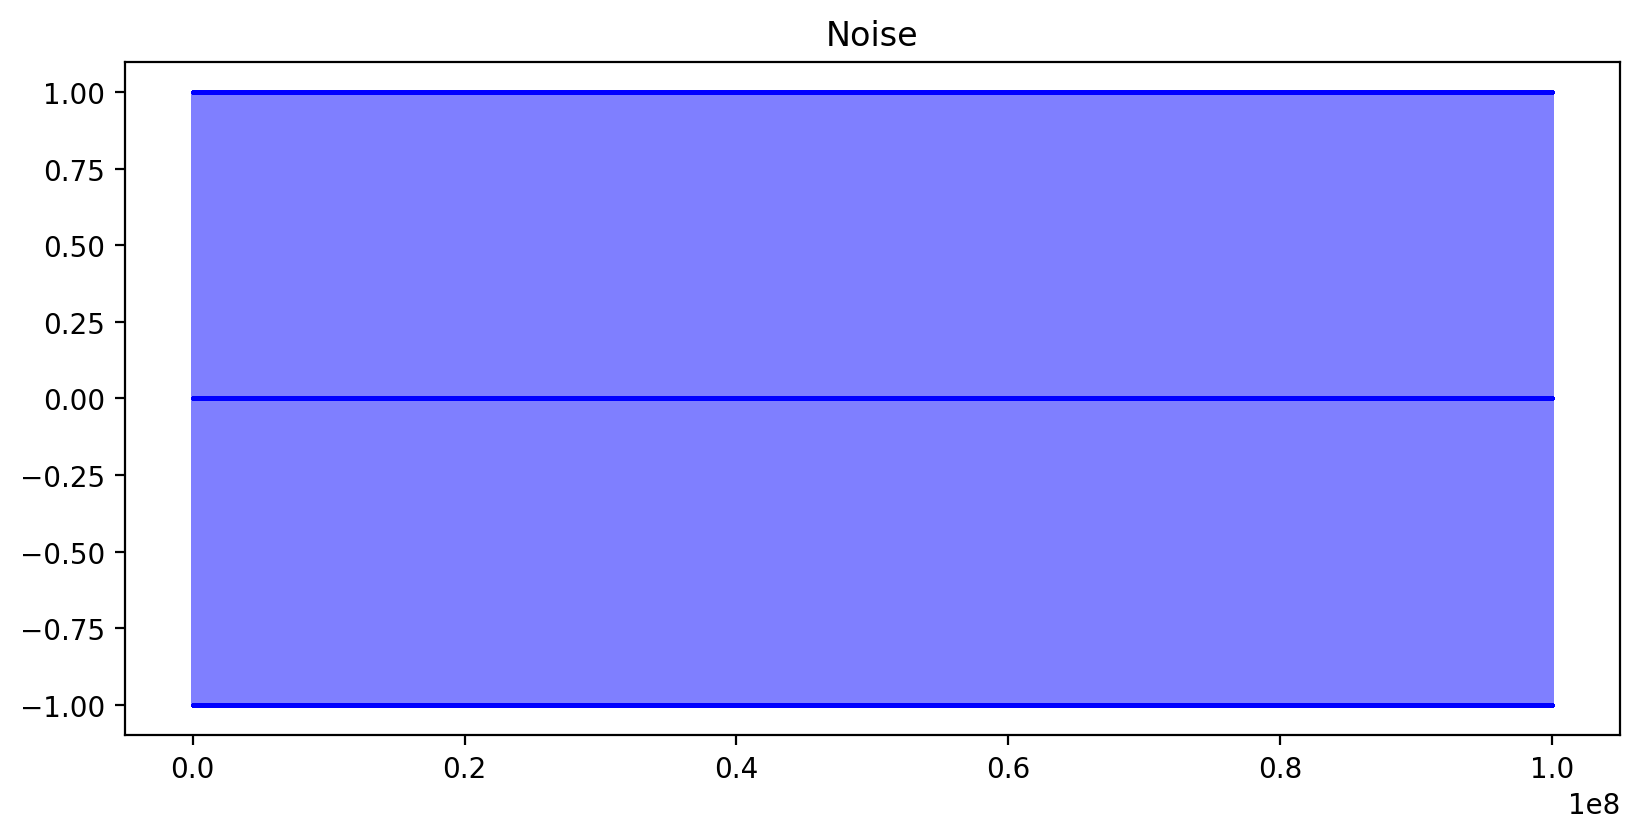

In [2]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Define parameters for the walk
dims = 1
step_n = int(1e8)
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))

# Simulate steps in 1D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)

path = np.concatenate([origin, steps]) #.cumsum(0)

# Plot the path
fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)
ax.scatter(np.arange(step_n+1), path, c='blue',alpha=0.25,s=0.05);
ax.plot(path,c='blue', alpha=0.5,lw=1) 
plt.title('Noise')
plt.tight_layout(pad=0)

print(f'mean +- std for 0:{int(step_n/2)} and {int(step_n/2)}:{step_n}')
print(path[:int(step_n/2)].mean().round(2),'+-', path[:int(step_n/2)].std().round(2))
print(path[int(step_n/2):].mean().round(2),'+-', path[int(step_n/2):].std().round(2))


In [3]:
windowsize=50
df = pd.DataFrame(path)
ax = df.rolling(windowsize, center=True, closed='both').mean().plot()
df.rolling(windowsize, center=True, closed='both').std().plot(ax = ax)
ax.legend(["mean over window", "std over window"]);

c:\Users\janni\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


## Aufgabe 2

(100000001, 1) (100000001,)


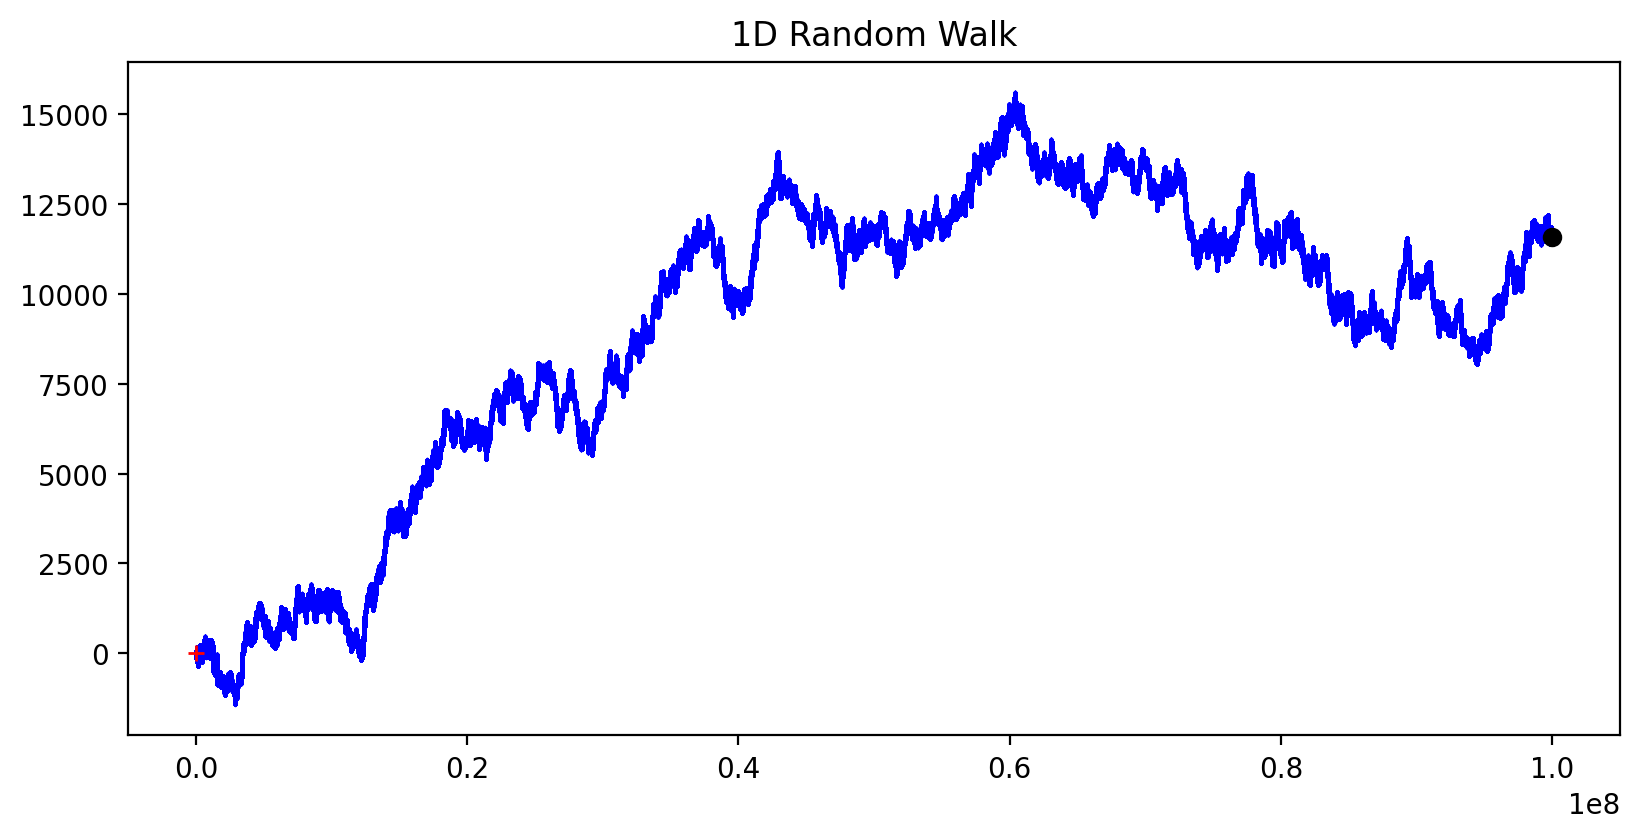

In [2]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Define parameters for the walk
dims = 1
step_n = int(1e8)
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))

# Simulate steps in 1D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)

X = np.arange(step_n+1)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]

# Plot the path
fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)
ax.scatter(X, path, c='blue',alpha=0.25,s=0.05);
ax.plot(path,c='blue', alpha=0.5,lw=1)
ax.plot(0, start, c='red', marker='+')
ax.plot(step_n, stop, c='black', marker='o')
plt.title('1D Random Walk')
plt.tight_layout(pad=0)

df = pd.DataFrame({'x': X, 'y':path.flatten()})
#df.to_csv("randomtest.csv", index = None)

print(path.shape, path.flatten().shape)

mean +- std for 0:500 and 500:1000
16.08 +- 9.38
2.92 +- 3.6
mean +- std for 0:500 and 500:1000
8.65 +- 9.83
24.58 +- 3.81
mean +- std for 0:500 and 500:1000
-20.06 +- 9.89
-9.85 +- 4.2
mean +- std for 0:500 and 500:1000
7.05 +- 5.68
10.61 +- 5.94


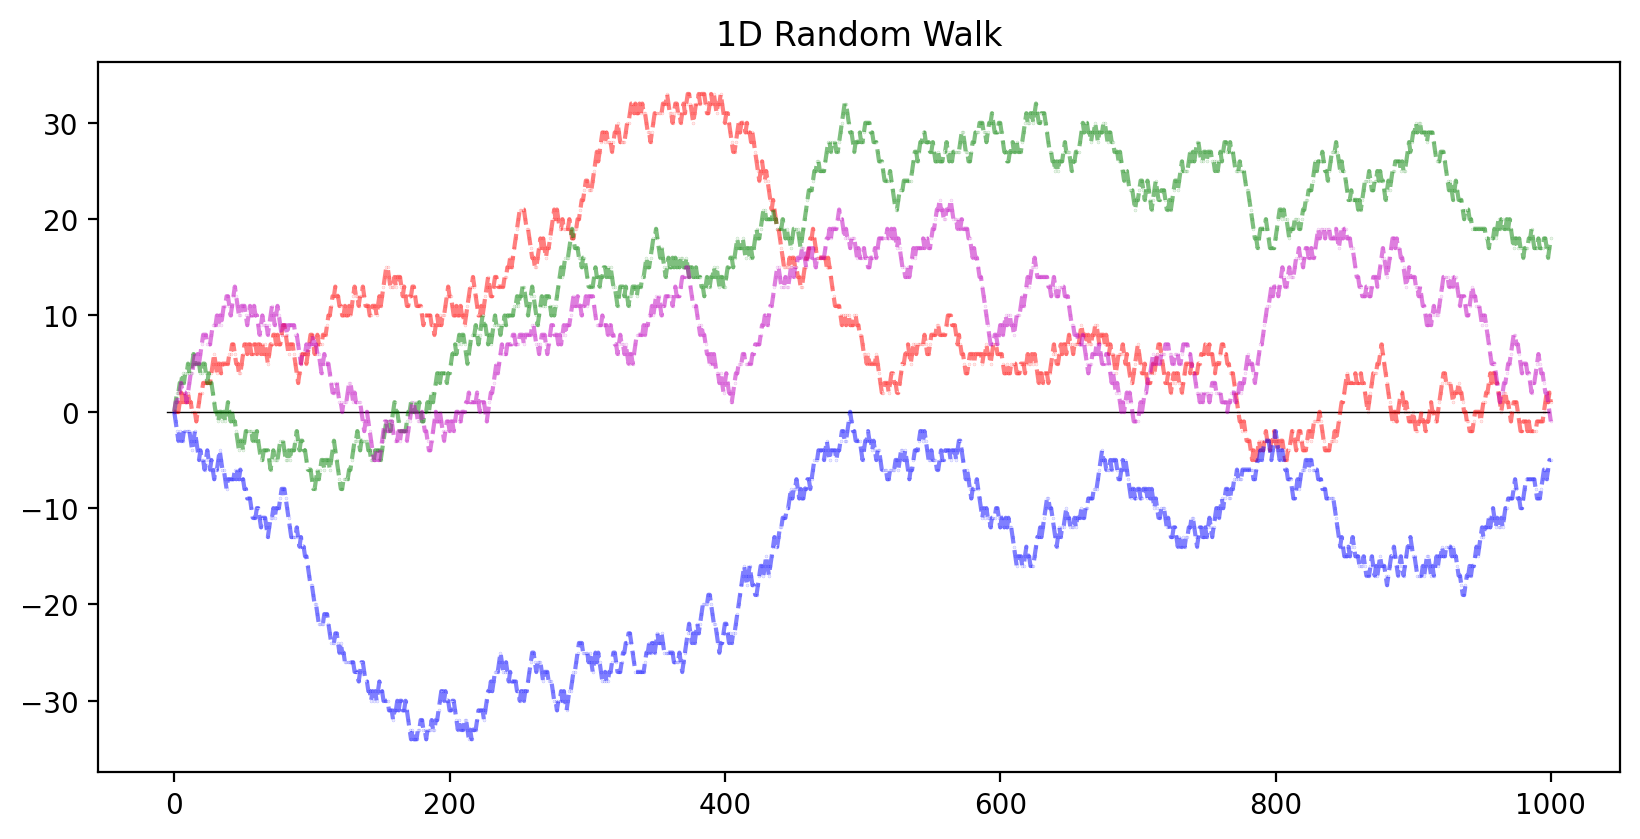

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define parameters for the walk
dims = 1
step_n = 1000
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))
step_shape = (step_n,dims)


fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)
ax.plot([-5,step_n-1], [0,0], c='k', lw=0.5)


for color in ['r', 'g', 'b', 'm']:

    # Simulate steps in 1D

    steps = np.random.choice(a=step_set, size=step_shape)

    path = np.concatenate([origin, steps]).cumsum(0)
    start = path[:1]
    stop = path[-1:]

    # Plot the path

    ax.scatter(np.arange(step_n+1), path, c=color,alpha=0.25,s=0.05);
    ax.plot(path,c= color, alpha=0.5,lw=1.5,ls='--',);
    #ax.plot(0, start, c='red', marker='+')
    #ax.plot(step_n, stop, c='black', marker='o')
    print(f'mean +- std for 0:{int(step_n/2)} and {int(step_n/2)}:{step_n}')
    print(path[:int(step_n/2)].mean().round(2), '+-', path[:int(step_n/2)].std().round(2))
    print(path[int(step_n/2):].mean().round(2), '+-', path[int(step_n/2):].std().round(2))
      
 
plt.title('1D Random Walk')
plt.tight_layout(pad=0)
plt.show()

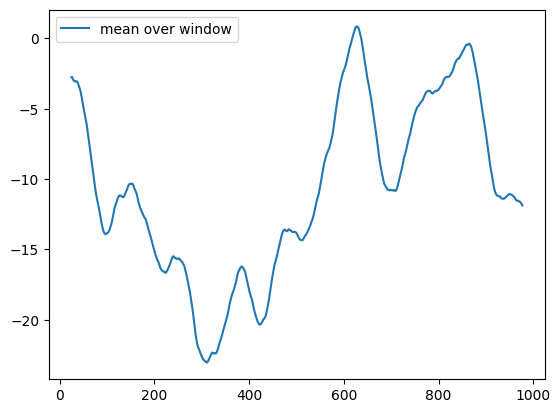

In [5]:
windowsize=50
df = pd.DataFrame(path)
ax = df.rolling(windowsize, center=True, closed='both').mean().plot(label='otto')
ax.legend(["mean over window"]);

## Random Walk limit

Entfernung vom Ursprung für n -> oo Schritte:

[Random walk - Wikipedia](https://en.wikipedia.org/wiki/Random_walk)

$$
\text{distance} = \sqrt {n} \cdot \sqrt {\frac {2}{\pi }}.
$$

oder:

$$
\pi = \frac{2 n}{\text{distance}^2}
$$


In [9]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()
th_lim = np.sqrt(2/np.pi)

### 1. Berechnung via Numpy (eine Runde)

In [18]:
%%time

dims = 1
step_n = int(2e5)  # Max: 2e8: 2sec
step_set = [-1, 1]
origin = np.zeros((1,dims)).astype(int) #Simulate steps in 2D
step_shape = (step_n,dims)
steps = rng.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)

CPU times: user 4.7 ms, sys: 113 µs, total: 4.82 ms
Wall time: 3.59 ms


In [19]:
print('expected: ', np.pi)
print('measured: ', (2 * step_n /path[-1][0]**2))

expected:  3.141592653589793
measured:  2.1633315305570577


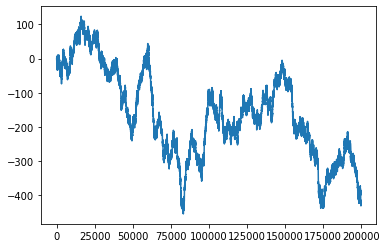

In [20]:
plt.plot(path)

### 1. Berechnung via Numpy (viele Runden)

Um Speicherplatz zu sparen, werden Runden aufaddiert.

In [21]:
%%time

dims = 1
# 1e8 steps, 120 rounds: 1.4 min (quick pc)
step_n = int(1e7)  # mem limit: 2e8: 2sec
rounds = 60 # 120 # 60
step_set = [-1, 1]
origin = np.zeros((1,dims)).astype(int) #Simulate steps in 2D
step_shape = (step_n,dims)
ipaths = []

for i in range(rounds):
    steps = rng.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    ipaths.append(np.abs(path[-1][0]))
    #print(path[-1][0]/np.sqrt(step_n)) 

print('th_lim: ',  th_lim)
print('observed: ', (ipaths/np.sqrt(step_n)).mean())
#ipaths/np.sqrt(step_n)

print("Approximation of pi")
#2n/dist ^2 = pi
print(2 * step_n/(np.array(ipaths).mean())**2)

th_lim:  0.7978845608028654
observed:  0.7499763108110667
Approximation of pi
3.555780174803777
CPU times: user 6.67 s, sys: 4.81 s, total: 11.5 s
Wall time: 11.6 s


In [22]:
cp = ipaths/np.sqrt(step_n)
t1 = np.arange(1,len(cp)+1)
cp2 = cp.cumsum()

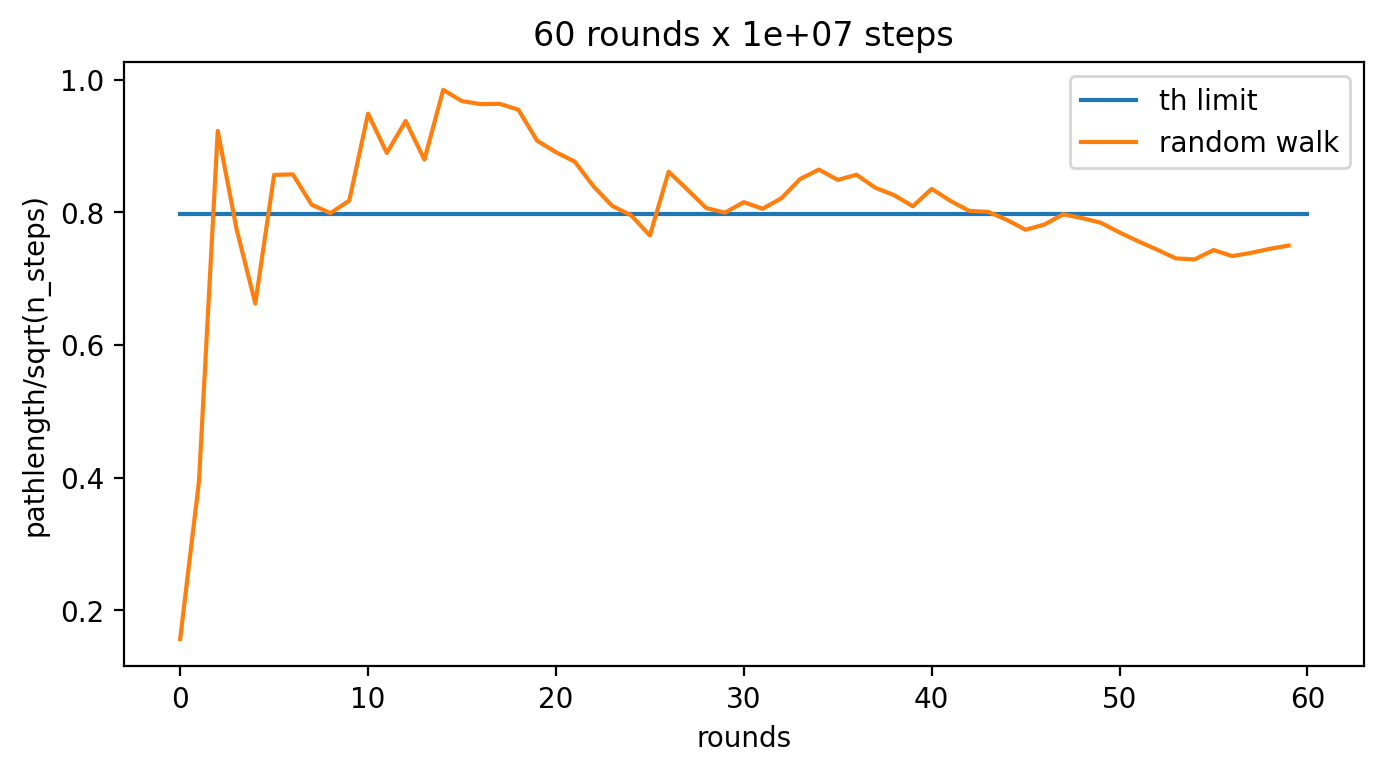

In [23]:
th_lim = np.sqrt(2/np.pi)

plt.figure(figsize=(8,4), dpi=200)
plt.title(f'{rounds:d} rounds x {step_n:.2g} steps')
plt.plot([0,rounds], [th_lim, th_lim], label = 'th limit')
plt.plot(cp2/t1, label = 'random walk')
plt.legend()
plt.xlabel('rounds')
plt.ylabel('pathlength/sqrt(n_steps)')
plt.show()

step_n = int(1e8)   
rounds = 120   
Approximation of pi:    
3.0855979186701785

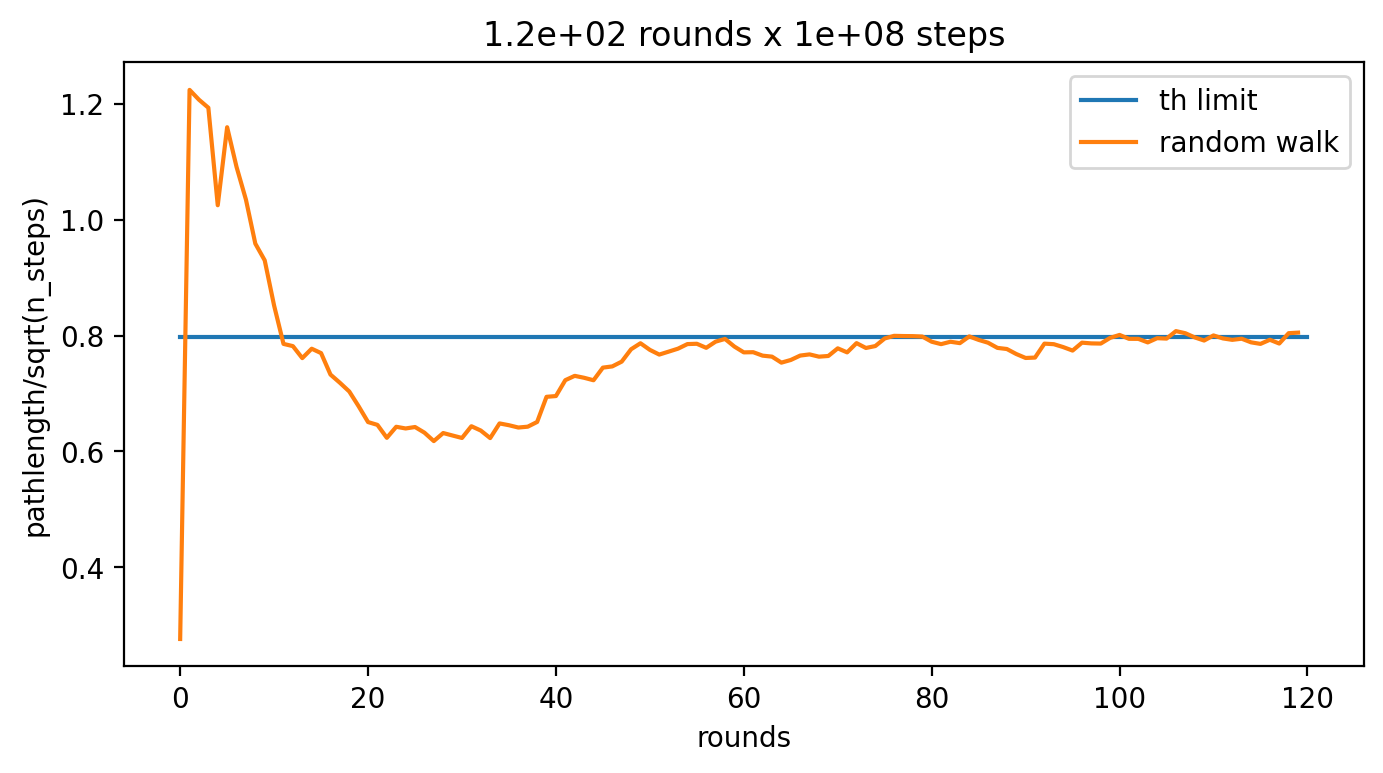

Wie oben, aber umgestellt auf Grenzwert 1/$\pi$

In [24]:
cp = np.array(ipaths)**2 / (2 * step_n)
t1 = np.arange(1,len(cp)+1)
cp2 = cp.cumsum()

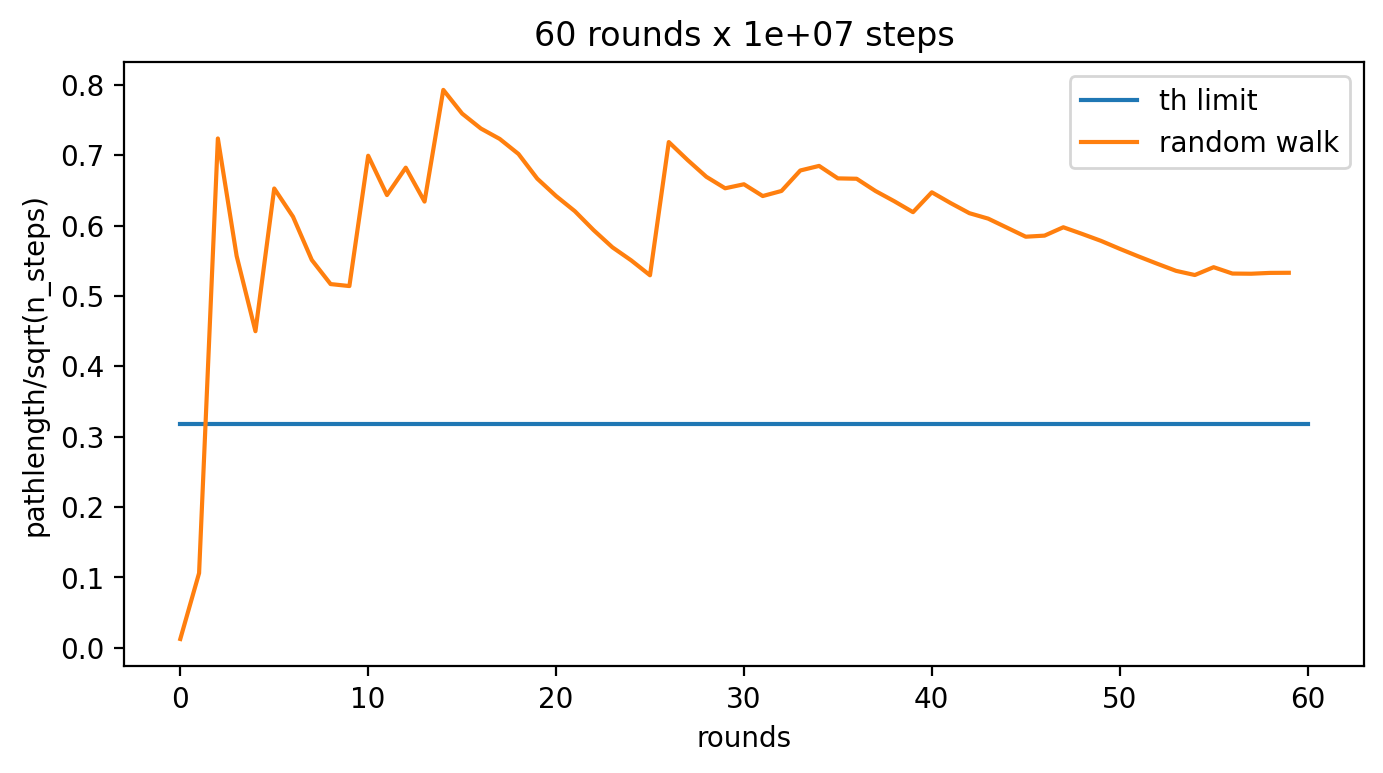

In [25]:
th_lim = np.sqrt(2/np.pi)

plt.figure(figsize=(8,4), dpi=200)
plt.title(f'{rounds:d} rounds x {step_n:.3g} steps')
plt.plot([0,rounds], [1/np.pi, 1/np.pi], label = 'th limit')
plt.plot(cp2/t1, label = 'random walk')
plt.legend()
plt.xlabel('rounds')
plt.ylabel('pathlength/sqrt(n_steps)')
plt.show()

### Version 3: Loop

No memory limitation but without array acceleration

In [48]:
%%time

dims = 1
step_set = [-1, 1]
step_n = int(1e5) # 1e5: 2 sec

pathlength = 0
for i in range(step_n):
    step = rng.choice(step_set, 1)[0]
    pathlength += step
    #print(step, pathlength)
    
print(pathlength, pathlength/np.sqrt(step_n), np.sqrt(2/np.pi)) 


262 0.8285167469641153 0.7978845608028654
CPU times: user 2.32 s, sys: 0 ns, total: 2.32 s
Wall time: 2.32 s


## Just for fun

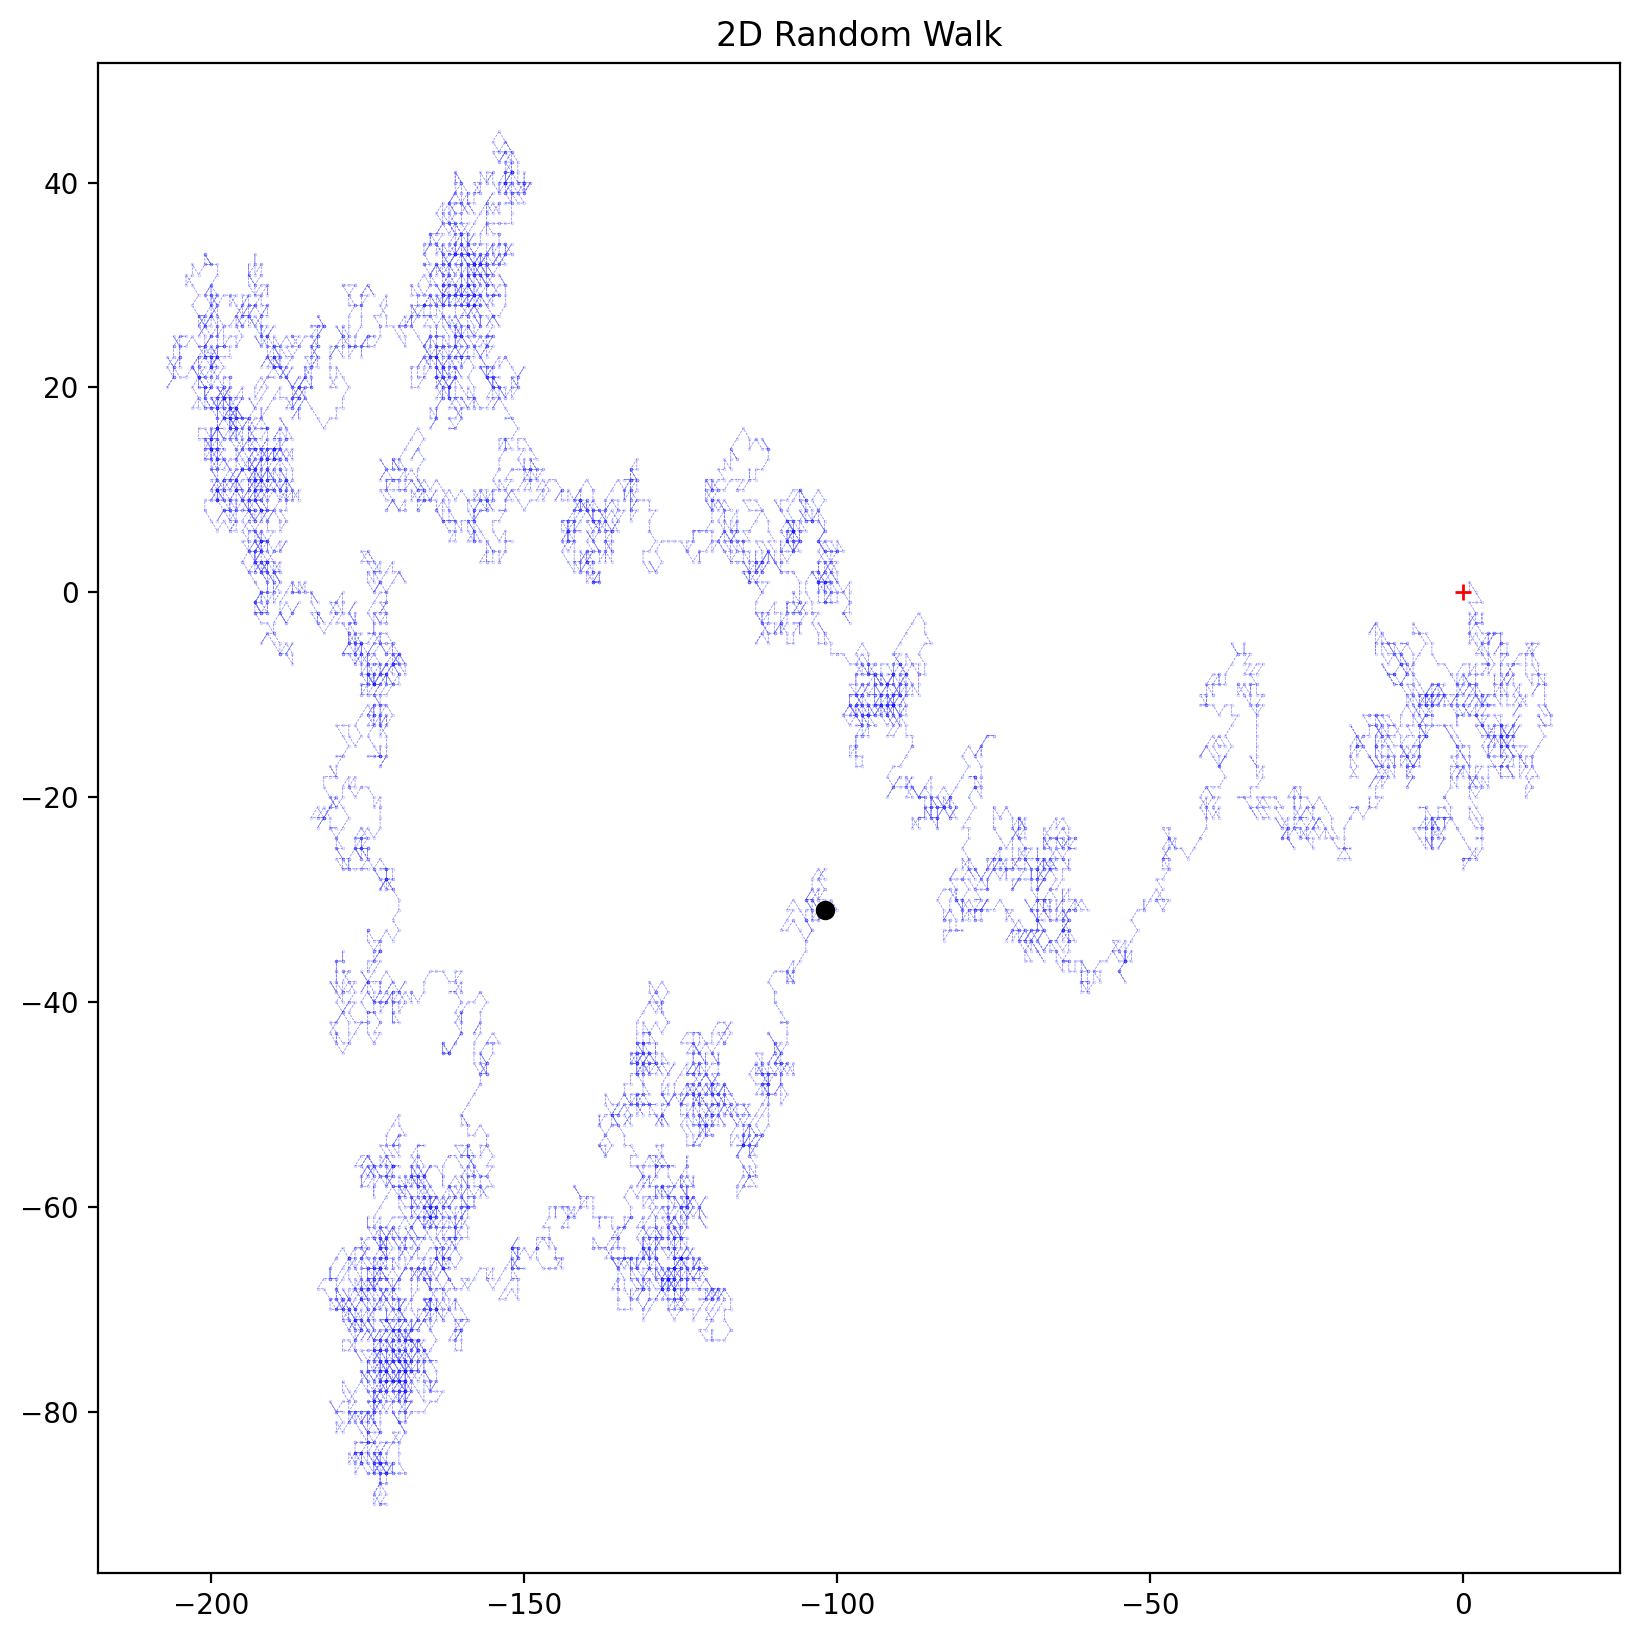

In [6]:
# Define parameters for the walk
dims = 2
step_n = 10000
step_set = [-1, 0, 1]
origin = np.zeros((1, dims))

# Simulate steps in 2D
step_shape = (step_n, dims)
steps = np.random.choice(a=step_set,  size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]

# Plot the path

fig = plt.figure(figsize=(8,8), dpi=200)
ax = fig.add_subplot(111)
ax.scatter(path[:,0], path[:,1], c='blue', alpha=0.25, s=0.05);
ax.plot(path[:,0], path[:,1], c='blue', alpha=0.5, lw=0.25, ls='--');
ax.plot(start[:,0], start[:,1], c='red', marker='+')
ax.plot(stop[:,0], stop[:,1], c='black', marker='o')
plt.title('2D Random Walk')
plt.tight_layout(pad=0)
plt.show()